In [ ]:
#Deep learning - Fianl Project
#Nadav Vaknin

In [ ]:
#Import the mnist dataset and preform EDA

In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Load data
(X, y), _ = mnist.load_data()



Dataset Shape: (60000, 28, 28), Labels Shape: (60000,)


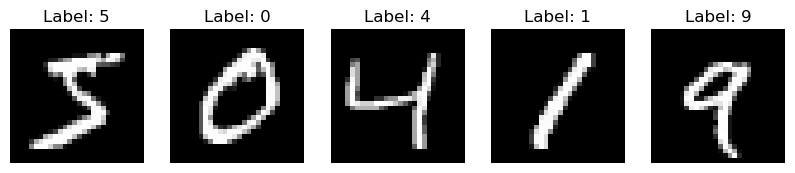

In [2]:
#2
# Check dataset shapes
print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")
# Visualize Sample Images

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()


In [3]:
# Check for Missing or Corrupt Data

print(f"Missing values in X: {np.isnan(X).sum()}")
print(f"Missing values in y: {np.isnan(y).sum()}")

Missing values in X: 0
Missing values in y: 0


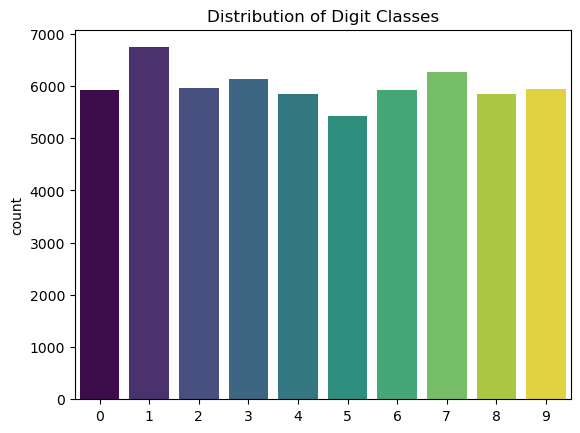

In [4]:
# Analyze Class Distribution

sns.countplot(x=y, hue=y, palette="viridis", legend=False)
plt.title("Distribution of Digit Classes")
plt.show()


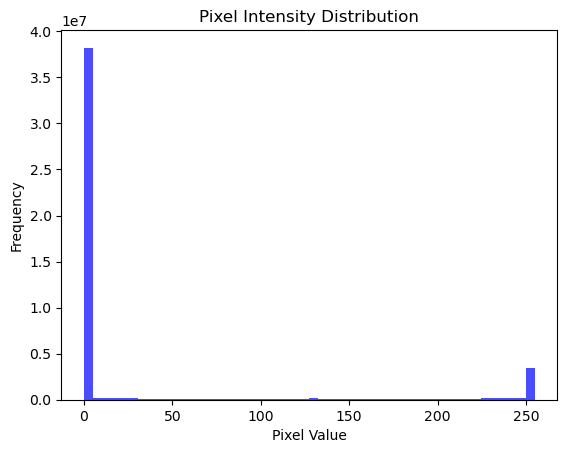

In [5]:
# Pixel Intensity Distribution

plt.hist(X.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [6]:
#3
# Reshape Data for Model Input
X = X.reshape(X.shape[0], -1)  # Flatten 28x28 images into 1D vector (784 features)
print(f"Reshaped X Shape: {X.shape}")


Reshaped X Shape: (60000, 784)


In [13]:
# Feature Scaling and Normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print("Data normalized to range [0, 1]")

Data normalized to range [0, 1]


In [15]:
#4
# Split Data into Training, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")


Training set shape: (42000, 784), Validation set shape: (9000, 784), Test set shape: (9000, 784)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'C': 10, 'gamma': 0.01}
Validation Accuracy: 0.9808
Test Accuracy: 0.9788

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       896
           1       0.99      1.00      0.99       976
           2       0.97      0.98      0.97       853
           3       0.98      0.96      0.97       941
           4       0.98      0.99      0.98       870
           5       0.97      0.97      0.97       841
           6       0.99      0.99      0.99       904
           7       0.98      0.98      0.98       985
           8       0.97      0.97      0.97       858
           9       0.97      0.97      0.97       876

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



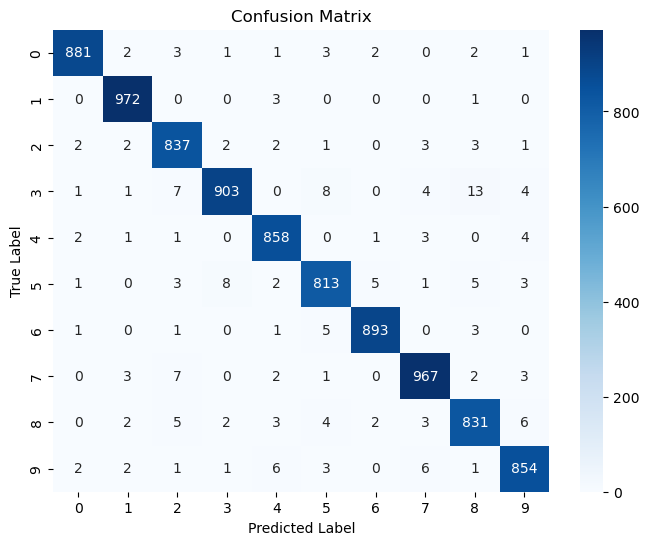

In [178]:
#5
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images for SVM (convert 28x28 to 1D vector of 784 features)
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0  # Normalize

# Split training data into Train (50%) and Validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)  

# Define SVM with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Validate model
val_accuracy = best_svm.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Test model
y_pred = best_svm.predict(X_test)

#5
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Training set shape: (42000, 28, 28, 1), Validation set shape: (9000, 28, 28, 1), Test set shape: (9000, 28, 28, 1)
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8474 - loss: 0.4879 - val_accuracy: 0.9810 - val_loss: 0.0632
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9720 - loss: 0.0929 - val_accuracy: 0.9854 - val_loss: 0.0447
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 0.9814 - loss: 0.0618 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9847 - loss: 0.0522 - val_accuracy: 0.9910 - val_loss: 0.0356
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9870 - loss: 0.0424 - val_accuracy: 0.9904 - val_loss: 0.0312
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9898 - loss: 0.0358 - val_accuracy: 0.9897 - val_loss: 0.0357
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.9894 - loss: 0.0326 - v

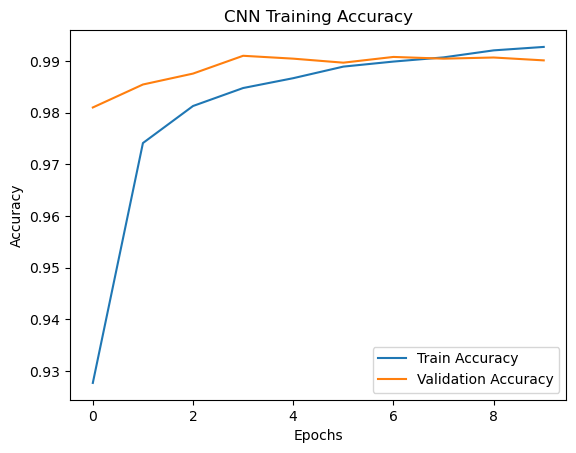

In [15]:
#6
(X, y), _ = mnist.load_data()
# Reshape Data for CNN Input
X = X.reshape(-1, 28, 28, 1)  # Reshape to (samples, 28, 28, 1) for CNN
X = X.astype('float32') / 255.0  # Normalize pixel values to [0,1]

# Convert Labels to One-Hot Encoding
y = to_categorical(y, num_classes=10)

# Split Data into Training, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")

# Build CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile CNN Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate CNN Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Accuracy')
plt.show()


Training iteration 1/15...

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8155 - loss: 0.5694 - val_accuracy: 0.9789 - val_loss: 0.0691
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9683 - loss: 0.1055 - val_accuracy: 0.9836 - val_loss: 0.0498
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9762 - loss: 0.0811 - val_accuracy: 0.9876 - val_loss: 0.0399
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9835 - loss: 0.0599 - val_accuracy: 0.9883 - val_loss: 0.0407
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9881 - val_loss: 0.0400
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9861 - val_loss: 0.0450
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accu

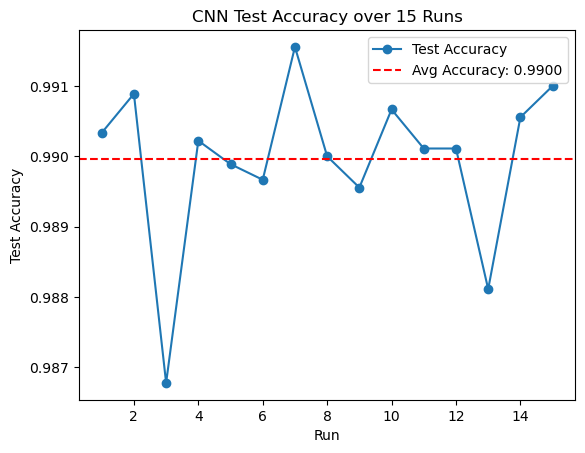

In [259]:
# Load MNIST dataset
(X, y), _ = tf.keras.datasets.mnist.load_data()

# Reshape and normalize data
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize pixel values
y = to_categorical(y, num_classes=10)  # One-hot encode labels

# Define CNN model function
def create_cnn():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Run training 15 times with different splits
num_runs = 15
test_accuracies = []

for i in range(num_runs):
    print(f"\nTraining iteration {i+1}/{num_runs}...\n")

    # Split data into training (70%), validation (15%), and test (15%) sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=i)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=i)

    # Train the model
    model = create_cnn()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
    test_accuracies.append(test_acc)
    print(f"Iteration {i+1} Test Accuracy: {test_acc:.4f}")

# Compute and print the average accuracy
average_accuracy = np.mean(test_accuracies)
print(f"\nFinal Average Test Accuracy over {num_runs} runs: {average_accuracy:.4f}")

# Plot test accuracy over multiple runs
plt.plot(range(1, num_runs + 1), test_accuracies, marker='o', linestyle='-', label='Test Accuracy')
plt.axhline(y=average_accuracy, color='r', linestyle='--', label=f'Avg Accuracy: {average_accuracy:.4f}')
plt.xlabel('Run')
plt.ylabel('Test Accuracy')
plt.title('CNN Test Accuracy over 15 Runs')
plt.legend()
plt.show()


282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


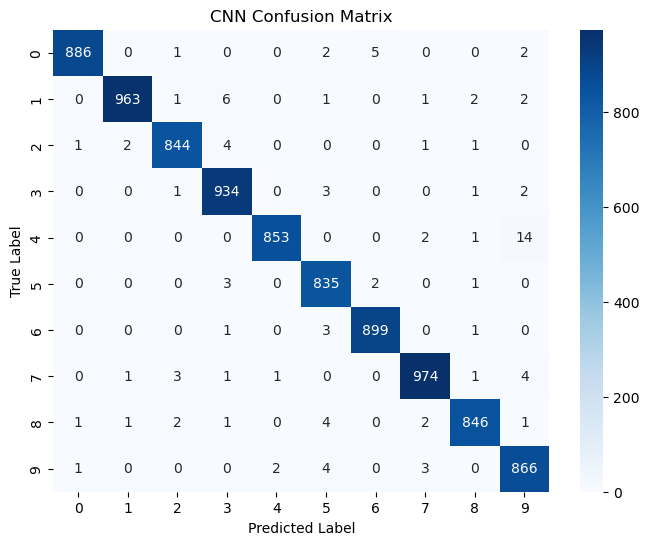

In [244]:
# Confusion Matrix for CNN Predictions
y_pred_cnn = model.predict(X_test).argmax(axis=1)
y_true_cnn = y_test.argmax(axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_cnn, y_pred_cnn), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Confusion Matrix")
plt.show()


Learning Rate: 0.01, Test Accuracy: 0.9775
Learning Rate: 0.001, Test Accuracy: 0.9922
Learning Rate: 0.0001, Test Accuracy: 0.9869


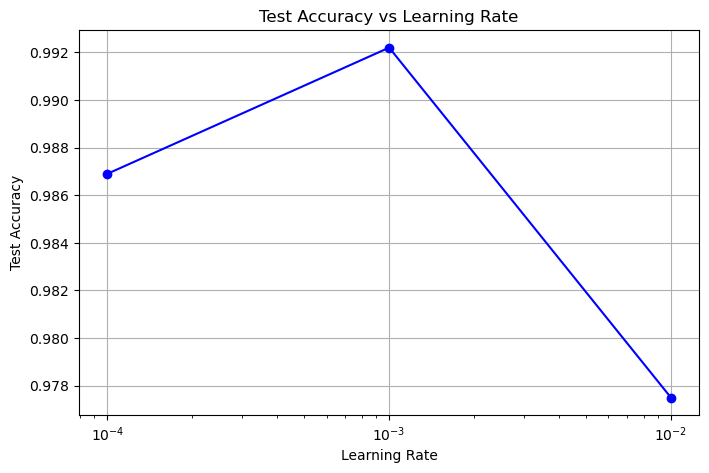

In [237]:
#9
from tensorflow.keras.optimizers import Adam

# Define function to train CNN with different learning rates
def train_cnn(learning_rate):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Learning Rate: {learning_rate}, Test Accuracy: {test_acc:.4f}")
    
    return history, test_acc

# Train CNN with 3 different learning rates
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    history, test_acc = train_cnn(lr)
    results[lr] = test_acc

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Learning Rate')
plt.grid()
plt.show()


Epochs: 5, Test Accuracy: 0.9903
Epochs: 10, Test Accuracy: 0.9920
Epochs: 20, Test Accuracy: 0.9925


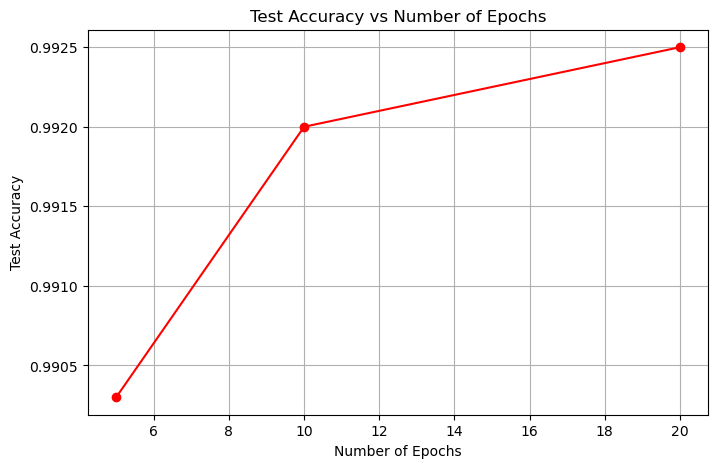

In [219]:
# Define function to train CNN with different epoch values
def train_cnn(epochs):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=32, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Epochs: {epochs}, Test Accuracy: {test_acc:.4f}")
    
    return history, test_acc

# Train CNN with 3 different epoch values
epoch_values = [5, 10, 20]
results = {}

for epochs in epoch_values:
    history, test_acc = train_cnn(epochs)
    results[epochs] = test_acc

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='r')
plt.xlabel('Number of Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Number of Epochs')
plt.grid()
plt.show()


Batch Size: 16, Test Accuracy: 0.9911
Batch Size: 32, Test Accuracy: 0.9926
Batch Size: 64, Test Accuracy: 0.9919
Batch Size: 128, Test Accuracy: 0.9922


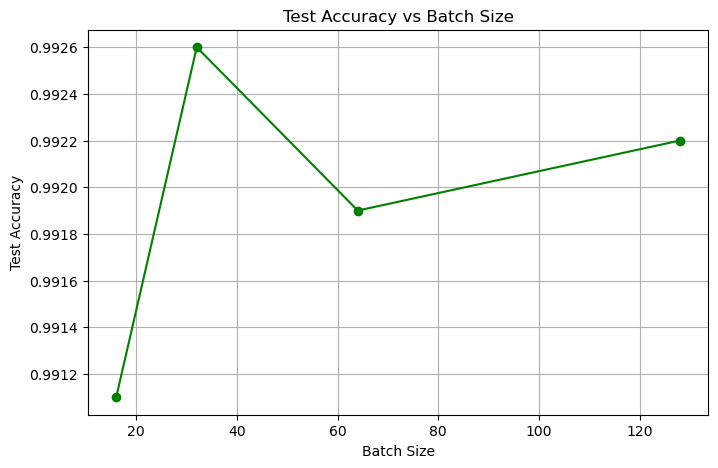

In [255]:
# Define function to train CNN with different batch sizes
def train_cnn(batch_size):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Batch Size: {batch_size}, Test Accuracy: {test_acc:.4f}")
    
    return history, test_acc

# Train CNN with 3 different batch sizes
batch_sizes = [16, 32, 64 ,128]
results = {}

for batch_size in batch_sizes:
    history, test_acc = train_cnn(batch_size)
    results[batch_size] = test_acc

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='g')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')
plt.grid()
plt.show()


In [155]:
#10
from sklearn.utils import shuffle

# Define function to train CNN
def train_cnn(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}")
    
    return model, history, test_acc

# Train the initial model
model, history, test_acc = train_cnn(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=32)

# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Identify misclassified samples
misclassified_indices = np.where(y_true_classes != y_pred_classes)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# # Remove misclassified samples from training data
# X_train_filtered = np.delete(X_train, misclassified_indices, axis=0)
# y_train_filtered = np.delete(y_train, misclassified_indices, axis=0)
# Number of times to duplicate misclassified samples
# Extract misclassified samples
X_misclassified = X_train[misclassified_indices]
y_misclassified = y_train[misclassified_indices]

num_repeats = 30 

# Duplicate misclassified samples
X_augmented = np.tile(X_misclassified, (num_repeats, 1, 1, 1))
y_augmented = np.tile(y_misclassified, (num_repeats, 1))

# Append to original training set
X_train_expanded = np.concatenate((X_train, X_augmented), axis=0)
y_train_expanded = np.concatenate((y_train, y_augmented), axis=0)

# Shuffle the dataset to maintain randomness
X_train_final, y_train_final = shuffle(X_train_expanded, y_train_expanded, random_state=42)

# Print the new dataset size
print(f"New training set size: {X_train_final.shape[0]}")
print(f"New training set shape after removing misclassified samples: {X_train_final.shape}")

# Retrain the model with cleaned data
model_filtered, history_filtered, test_acc_filtered = train_cnn(X_train_final, y_train_final, X_val, y_val, X_test, y_test, batch_size=32)

print(f"Test Accuracy after removing misclassified samples: {test_acc_filtered:.4f}")


Test Accuracy: 0.9930
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Number of misclassified samples: 70
New training set size: 50100
New training set shape after removing misclassified samples: (50100, 28, 28, 1)
Test Accuracy: 0.9918
Test Accuracy after removing misclassified samples: 0.9918


In [138]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

# Load MNIST dataset
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] range and reshape for CNN
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y = tf.keras.utils.to_categorical(y, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define CNN model
def create_cnn():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Perform 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
misclassified_indices = []
base_accuracies = []  # Store initial accuracies

print("\nTraining the baseline CNN model with 5-Fold Cross Validation...\n")

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = create_cnn()
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    
    # Evaluate on validation set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    base_accuracies.append(test_accuracy)  # Store base accuracy

    print(f"Fold {fold+1} Test Accuracy: {test_accuracy:.4f}")

    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_val, axis=1)

    # Store misclassified indices
    misclassified = val_index[y_pred_labels != y_true_labels]
    misclassified_indices.extend(misclassified)

# Convert list to numpy array
misclassified_indices = np.array(misclassified_indices)

# Extract misclassified samples
X_misclassified = X[misclassified_indices]
y_misclassified = y[misclassified_indices]

# Duplicate misclassified samples 30 times
num_repeats = 30
X_augmented = np.tile(X_misclassified, (num_repeats, 1, 1, 1))
y_augmented = np.tile(y_misclassified, (num_repeats, 1))

# Create new training set with added misclassified samples
X_train_final = np.concatenate((X, X_augmented), axis=0)
y_train_final = np.concatenate((y, y_augmented), axis=0)

# Shuffle dataset
X_train_final, y_train_final = shuffle(X_train_final, y_train_final, random_state=42)

print("\nRetraining CNN with augmented dataset including misclassified samples...\n")

# Train the CNN again with the expanded dataset
model_final = create_cnn()
model_final.fit(X_train_final, y_train_final, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on original test set
final_test_loss, final_test_accuracy = model_final.evaluate(X_test, y_test, verbose=1)
print("\nFinal Model Evaluation:")
print(f"Final Model Test Accuracy: {final_test_accuracy:.4f}")

# Print comparison of accuracies
print("\nComparison of CNN Performance Before and After Adding Misclassified Samples:")
for i, acc in enumerate(base_accuracies):
    print(f"Fold {i+1} Initial Test Accuracy: {acc:.4f}")
    
print(f"\nFinal Model Test Accuracy (After Adding Misclassified Samples): {final_test_accuracy:.4f}")



Training the baseline CNN model with 5-Fold Cross Validation...

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8500 - loss: 0.4765 - val_accuracy: 0.9830 - val_loss: 0.0574
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9718 - loss: 0.1001 - val_accuracy: 0.9872 - val_loss: 0.0460
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9789 - loss: 0.0694 - val_accuracy: 0.9886 - val_loss: 0.0367
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9887 - val_loss: 0.0405
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9862 - loss: 0.0451 - val_accuracy: 0.9906 - val_loss: 0.0334
Fold 1 Test Accuracy: 0.9912
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8488 - loss: 0.4663 - val_accuracy: 0.9808 - val_loss: 0.0641
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9725 - lo

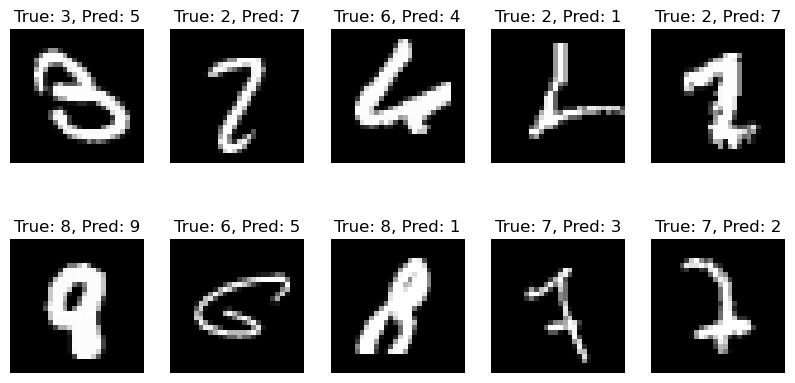

In [157]:
# Visualize misclassified samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_indices):
        idx = misclassified_indices[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_true_classes[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis("off")
plt.show()


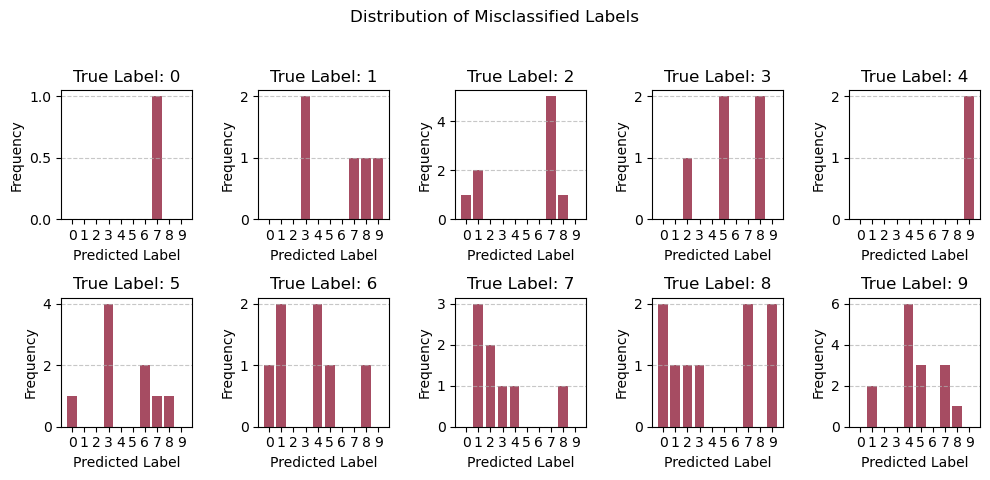

In [197]:
# List misclassified samples
misclassified_samples = [(y_true_classes[idx], y_pred_classes[idx]) for idx in misclassified_indices]
# Plot histograms of misclassified labels
fig, axes = plt.subplots(2,5, figsize=(10, 5))
fig.suptitle("Distribution of Misclassified Labels")

for i in range(10):
    ax = axes[i // 5, i % 5]
    wrong_preds = [pred for true, pred in misclassified_samples if true == i]
    ax.hist(wrong_preds, bins=range(11), align='left', rwidth=0.8, color="#800020", alpha=0.7)
    ax.set_title(f"True Label: {i}")
    ax.set_xticks(range(10))
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('C:/Users/Nadav Vaknin/Downloads/Distribution of Misclassified Labels.png')

plt.show()


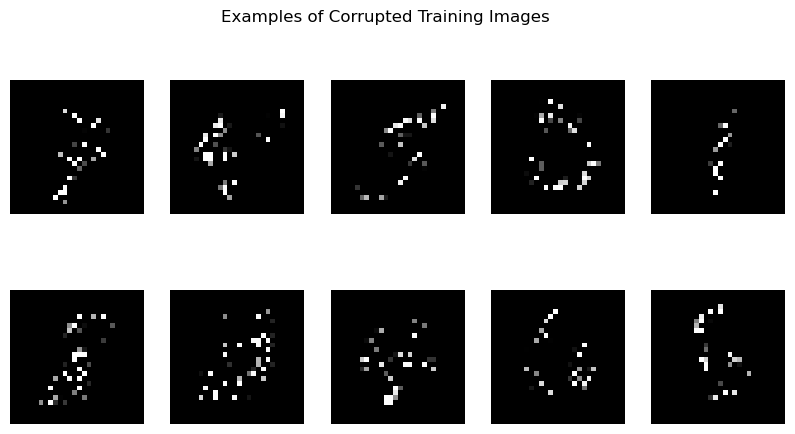

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6819 - loss: 0.9606
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8549 - loss: 0.4531
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8728 - loss: 0.4016
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8787 - loss: 0.3703
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8874 - loss: 0.3455
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8926 - loss: 0.3205
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9000 - loss: 0.3013
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9061 - loss: 0.2744
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9119 - loss: 0.2521
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9165 - loss: 0.2420
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.2813
Test Accuracy on Unchanged Test Set: 0.9122


In [64]:
#11
# Load original MNIST data
(X, y), _ = mnist.load_data()

# Normalize and reshape data
X = X.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=10)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to randomly set X% of pixels to black
def corrupt_images(images, corruption_rate=0.8):
    corrupted_images = images.copy()
    num_pixels = int(corruption_rate * 28 * 28)
    for img in corrupted_images:
        indices = np.random.choice(28 * 28, num_pixels, replace=False)
        img.reshape(-1)[indices] = 0  # Set selected pixels to black
    return corrupted_images

# Corrupt training images
X_train_corrupted = corrupt_images(X_train)

# Display some corrupted images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_corrupted[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Examples of Corrupted Training Images")
plt.show()

# Define CNN model
def create_cnn():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model on corrupted training set
model = create_cnn()
history = model.fit(X_train_corrupted, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate model on unchanged test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy on Unchanged Test Set: {test_acc:.4f}")


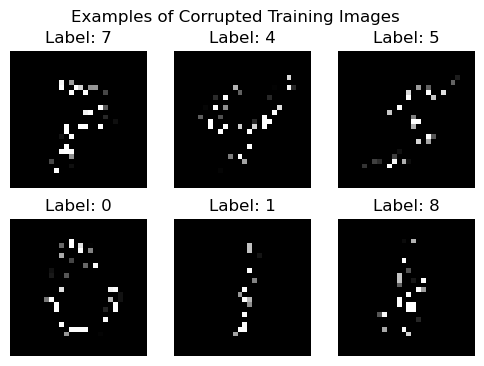

In [128]:
# Display some corrupted images
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_corrupted[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis('off')
plt.suptitle("Examples of Corrupted Training Images")
plt.savefig('C:/Users/Nadav Vaknin/Downloads/Examples of Corrupted Training Images.png')

plt.show()

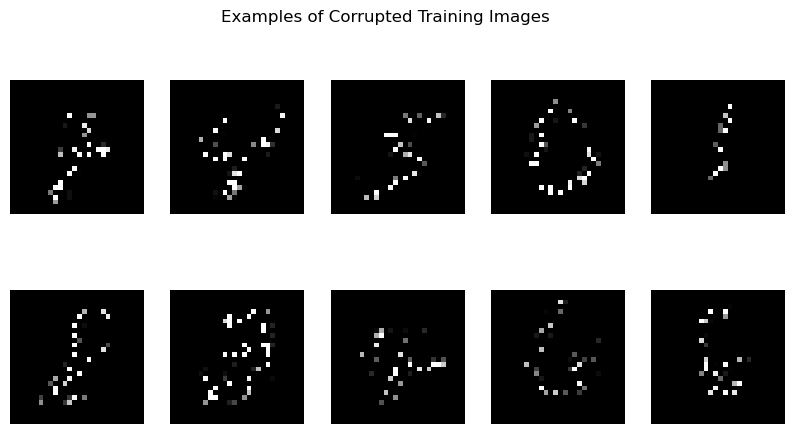

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6902 - loss: 0.9314 - val_accuracy: 0.9142 - val_loss: 0.3188
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8625 - loss: 0.4250 - val_accuracy: 0.9133 - val_loss: 0.3784
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8859 - loss: 0.3599 - val_accuracy: 0.9139 - val_loss: 0.3105
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8939 - loss: 0.3309 - val_accuracy: 0.9070 - val_loss: 0.3068
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8997 - loss: 0.3058 - val_accuracy: 0.9178 - val_loss: 0.2900
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9055 - loss: 0.2869 - val_accuracy: 0.9132 - val_loss: 0.3193
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9104 - loss: 0.2679 - val_accuracy: 0.9022 - val_loss: 0.3985
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9155 - loss: 0.2499 -

In [78]:
# Load original MNIST data
(X, y), _ = mnist.load_data()

# Normalize and reshape data
X = X.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=10)

# Split data into 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to randomly set 10% of non-black pixels to black in each image
def corrupt_images(images, corruption_rate=0.8):
    corrupted_images = images.copy()
    for img in corrupted_images:
        img_reshaped = img.reshape(-1)
        non_black_indices = np.where(img_reshaped > 0)[0]  # Get indices of non-black pixels
        num_pixels = int(corruption_rate * len(non_black_indices))  # 10% of non-black pixels
        if num_pixels > 0:
            indices_to_black = np.random.choice(non_black_indices, num_pixels, replace=False)
            img_reshaped[indices_to_black] = 0  # Set selected pixels to black
    return corrupted_images

# Corrupt training images
X_train_corrupted = corrupt_images(X_train)

# Display some corrupted images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_corrupted[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("Examples of Corrupted Training Images")
plt.show()

# Define CNN model
def create_cnn():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model on corrupted training set
model = create_cnn()
history = model.fit(X_train_corrupted, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, verbose=1)

# Evaluate model on unchanged test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy on Unchanged Test Set: {test_acc:.4f}")


In [110]:
# Load original MNIST data
(X, y), _ = mnist.load_data()

# Normalize and reshape data
X = X.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes=10)

# Split data into 50% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.997, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.9, random_state=42)

# Define CNN model
def create_cnn():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model on 50% of the dataset
model = create_cnn()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, verbose=1)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy on Test Set: {test_acc:.4f}")



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.1408 - loss: 2.2496 - val_accuracy: 0.2496 - val_loss: 2.1538
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.3416 - loss: 1.9997 - val_accuracy: 0.4313 - val_loss: 1.9077
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.4606 - loss: 1.7187 - val_accuracy: 0.6297 - val_loss: 1.5235
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6287 - loss: 1.2742 - val_accuracy: 0.6292 - val_loss: 1.2514
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7655 - loss: 0.9258 - val_accuracy: 0.6829 - val_loss: 1.0691
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.6882 - loss: 0.8735 - val_accuracy: 0.7273 - val_loss: 0.9043
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8017 - loss: 0.7314 - val_accuracy: 0.7310 - val_loss: 0.9358
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.8464 - loss: 0.6064 - val_accuracy: 0.7802 - val_loss:

Original Training Set Shape: (60000, 28, 28, 1)
Bootstrapped Training Set Shape: (600000, 28, 28, 1)


C:\Users\Nadav Vaknin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8649 - loss: 0.4308 - val_accuracy: 0.9843 - val_loss: 0.0469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9754 - loss: 0.0813 - val_accuracy: 0.9878 - val_loss: 0.0372
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9814 - loss: 0.0610 - val_accuracy: 0.9902 - val_loss: 0.0303
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9865 - loss: 0.0461 - val_accuracy: 0.9921 - val_loss: 0.0264
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9891 - loss: 0.0352 - val_accuracy: 0.9908 - val_loss: 0.0308
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9925 - val_loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9922 - loss: 0.0260 - val_accuracy: 0.9936 - val_loss: 0.0227
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9926 -

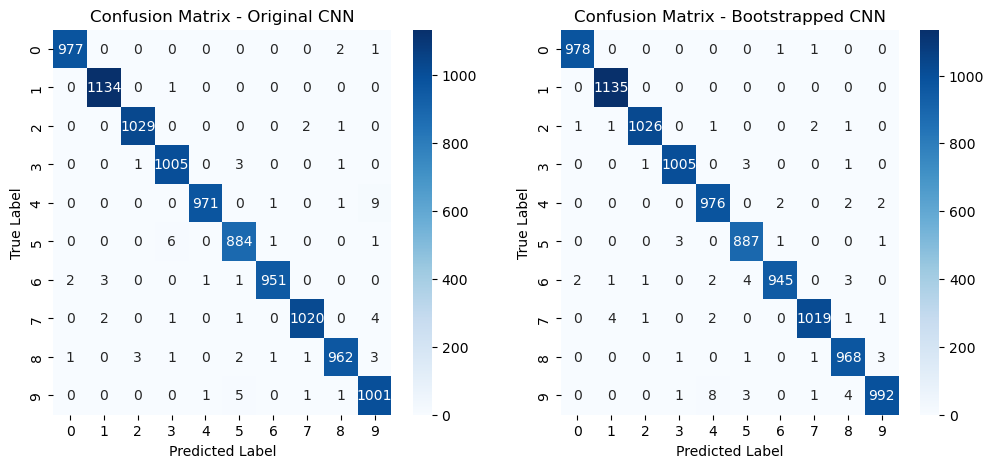

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Bootstrap Sampling: Create a dataset 10x larger (600,000 samples)
X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, replace=True, n_samples=600000, random_state=42)

print(f"Original Training Set Shape: {X_train.shape}")
print(f"Bootstrapped Training Set Shape: {X_train_bootstrap.shape}")

# Define CNN model
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train on Original MNIST
cnn_original = create_cnn()
cnn_original.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Train on Bootstrapped MNIST
cnn_bootstrap = create_cnn()
cnn_bootstrap.fit(X_train_bootstrap, y_train_bootstrap, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate models
original_test_loss, original_test_acc = cnn_original.evaluate(X_test, y_test, verbose=0)
bootstrap_test_loss, bootstrap_test_acc = cnn_bootstrap.evaluate(X_test, y_test, verbose=0)

print(f"Original CNN Test Accuracy: {original_test_acc:.4f}")
print(f"Bootstrapped CNN Test Accuracy: {bootstrap_test_acc:.4f}")

# Predictions for confusion matrix
y_pred_original = np.argmax(cnn_original.predict(X_test), axis=1)
y_pred_bootstrap = np.argmax(cnn_bootstrap.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_true, y_pred_original), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Original CNN")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_true, y_pred_bootstrap), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - Bootstrapped CNN")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


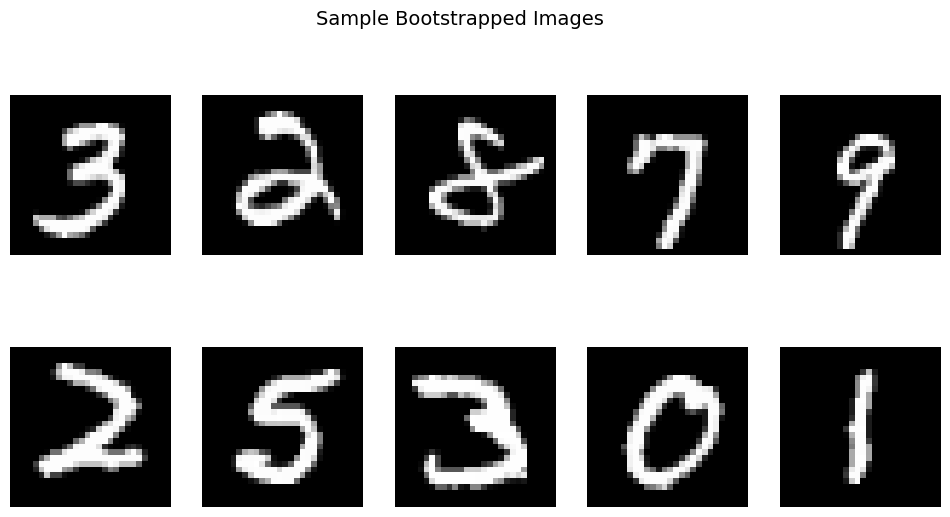

In [212]:
import matplotlib.pyplot as plt

# Select a random subset of bootstrapped images to display
num_images = 10  # Number of images to display
indices = np.random.choice(X_train_bootstrap.shape[0], num_images, replace=False)

# Plot images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_bootstrap[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Bootstrapped Images", fontsize=14)
plt.show()


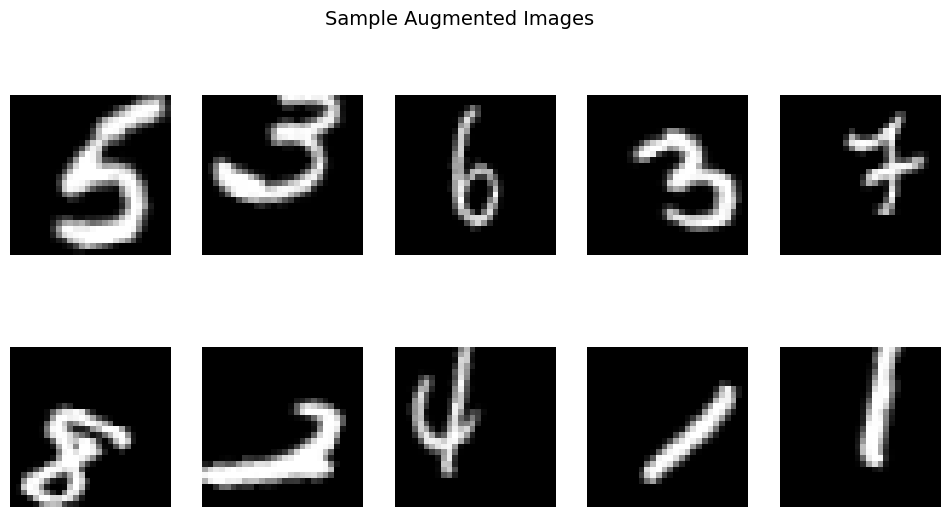

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift width by up to 20% of the image width
    height_shift_range=0.2, # Shift height by up to 20% of the image height
    shear_range=0.15,       # Apply shearing transformations
    zoom_range=0.2,         # Randomly zoom in on images
    horizontal_flip=False,  # No horizontal flipping (digits are directional)
    fill_mode='nearest'     # Fill pixels using the nearest mode
)

# Select a random sample from the training dataset
num_images = 10
indices = np.random.choice(X_train.shape[0], num_images, replace=False)
sample_images = X_train[indices]

# Apply augmentation and visualize results
plt.figure(figsize=(12, 6))
for i, img in enumerate(sample_images):
    augmented_img = datagen.random_transform(img.reshape(28, 28, 1))  # Apply augmentation
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_img.squeeze(), cmap='gray')  # Display augmented image
    plt.axis('off')

plt.suptitle("Sample Augmented Images", fontsize=14)
plt.show()


Epoch 1/10


C:\Users\Nadav Vaknin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Nadav Vaknin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5055 - loss: 1.4229 - val_accuracy: 0.9327 - val_loss: 0.2275
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8217 - loss: 0.5616 - val_accuracy: 0.9628 - val_loss: 0.1279
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8735 - loss: 0.4172 - val_accuracy: 0.9588 - val_loss: 0.1383
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8938 - loss: 0.3426 - val_accuracy: 0.9674 - val_loss: 0.1103
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9132 - loss: 0.2870 - val_accuracy: 0.9654 - val_loss: 0.1149
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9226 - loss: 0.2621 - val_accuracy: 0.9808 - val_loss: 0.0677
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9306 - loss: 0.2307 - val_accuracy: 0.9817 - val_loss: 0.0618
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9343 - loss: 0.2223 - val_accurac

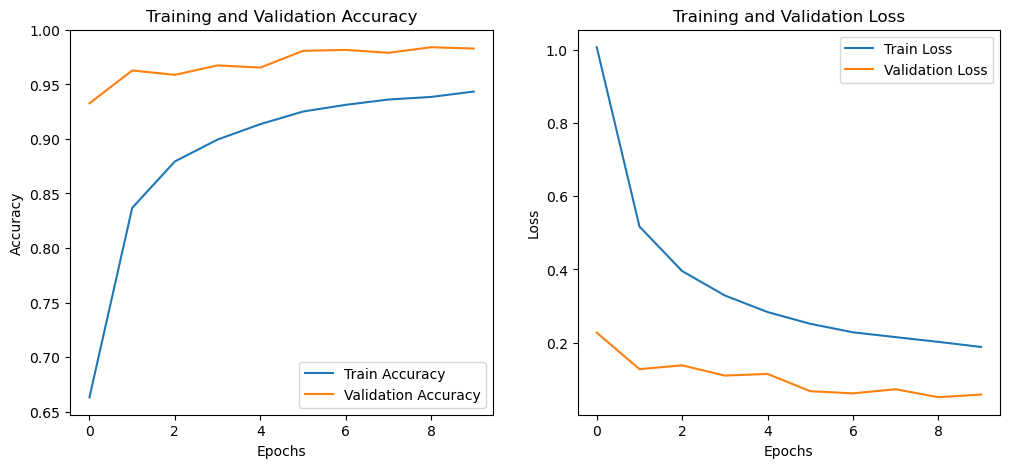

In [216]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data and reshape
X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X = np.expand_dims(X, axis=-1)  # Reshape to (28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)
y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)

# Split training and validation sets (50% of original data for training, 15% for testing)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Define Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Generate augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=64)

# Define CNN model
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model 

# Create and train CNN
cnn_model = create_cnn()
history = cnn_model.fit(train_generator, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.show()


In [ ]:
#12
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, GlobalAveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler

(X, y), _ = mnist.load_data()
# Reshape Data for CNN Input
X = X.reshape(-1, 28, 28, 1)  # Reshape to (samples, 28, 28, 1) for CNN
X = X.astype('float32') / 255.0  # Normalize pixel values to [0,1]

# Convert Labels to One-Hot Encoding
y = to_categorical(y, num_classes=10)

# Split Data into Training, Validation, and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test

print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")

# Build CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Added extra dense layer
    Dropout(0.4),
    Dense(10, activation='softmax')
])


# def scheduler(epoch, lr):
#     if epoch < 5:
#         return lr
#     else:
#         return lr * 0.9  # Decay the learning rate by 10% every 5 epochs

# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Training with scheduler
# lr_scheduler = LearningRateScheduler(scheduler)
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val),
#                     epochs=10, batch_size=32, verbose=1, 
#                     callbacks=[lr_scheduler])

# Compile CNN Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate CNN Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Accuracy')
plt.show()




Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8510 - loss: 0.4669 - val_accuracy: 0.9833 - val_loss: 0.0548
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9741 - loss: 0.0863 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9887 - val_loss: 0.0383
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9848 - loss: 0.0477 - val_accuracy: 0.9890 - val_loss: 0.0341
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9867 - loss: 0.0403 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9895 - loss: 0.0359 - val_accuracy: 0.9891 - val_loss: 0.0360
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9892 - loss: 0.0310 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9925 - loss: 0

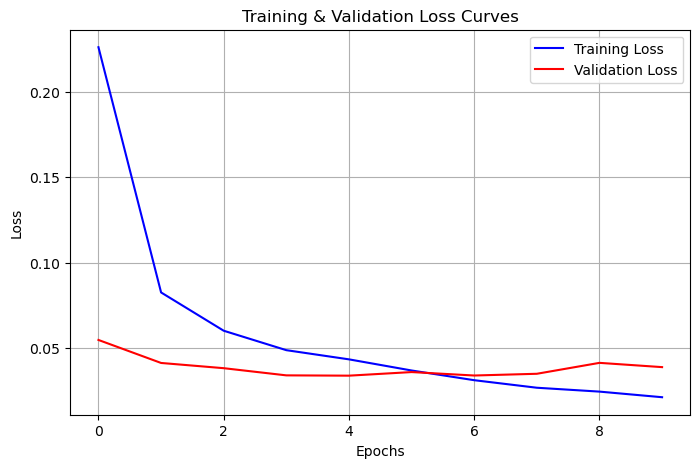

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Nadav Vaknin\AppData\Local\Temp\ipykernel_36856\2081116653.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=class_accuracy, palette="viridis")


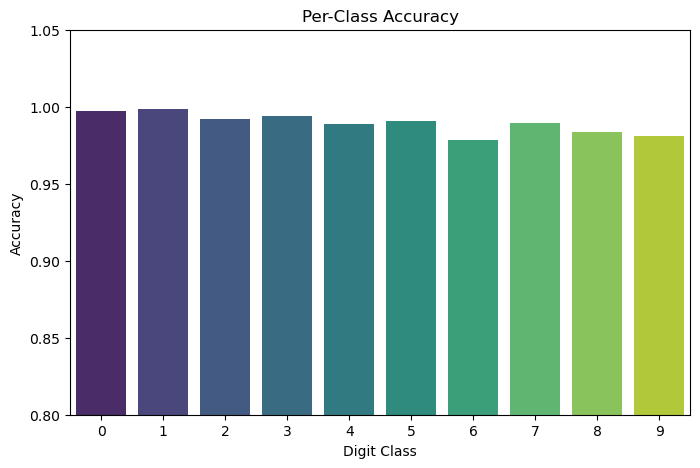


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
#13
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split train set further into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training & Validation Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss Curves')
plt.grid()
plt.show()

# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute per-class accuracy
conf_matrix = confusion_matrix(y_true, y_pred)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Display per-class accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(10), y=class_accuracy, palette="viridis")
plt.xlabel("Digit Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.ylim(0.8, 1.05)  # Adjust limits to emphasize differences
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8358 - loss: 0.5133 - top_k_categorical_accuracy: 0.9365 - val_accuracy: 0.9785 - val_loss: 0.0679 - val_top_k_categorical_accuracy: 0.9979
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9684 - loss: 0.1049 - top_k_categorical_accuracy: 0.9967 - val_accuracy: 0.9862 - val_loss: 0.0476 - val_top_k_categorical_accuracy: 0.9992
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9798 - loss: 0.0713 - top_k_categorical_accuracy: 0.9981 - val_accuracy: 0.9874 - val_loss: 0.0403 - val_top_k_categorical_accuracy: 0.9992
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9817 - loss: 0.0597 - top_k_categorical_accuracy: 0.9986 - val_accuracy: 0.9872 - val_loss: 0.0427 - val_top_k_categorical_accuracy: 0.9990
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9852 - loss: 0.0485 - top_k_categorical_accuracy: 0.9988 - val_accuracy: 0.9875 - val_loss: 0.04

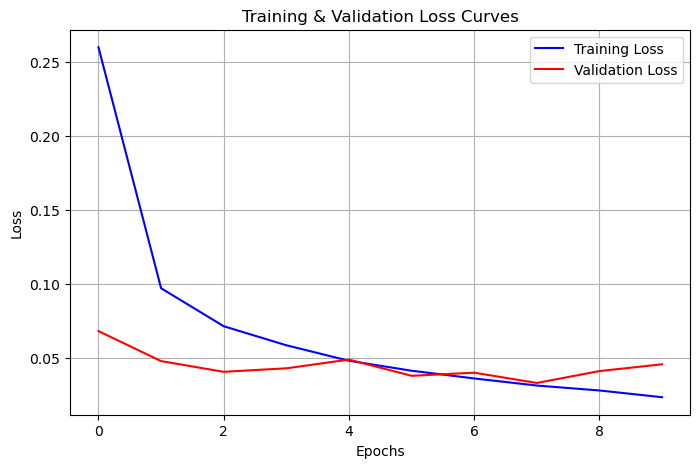

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


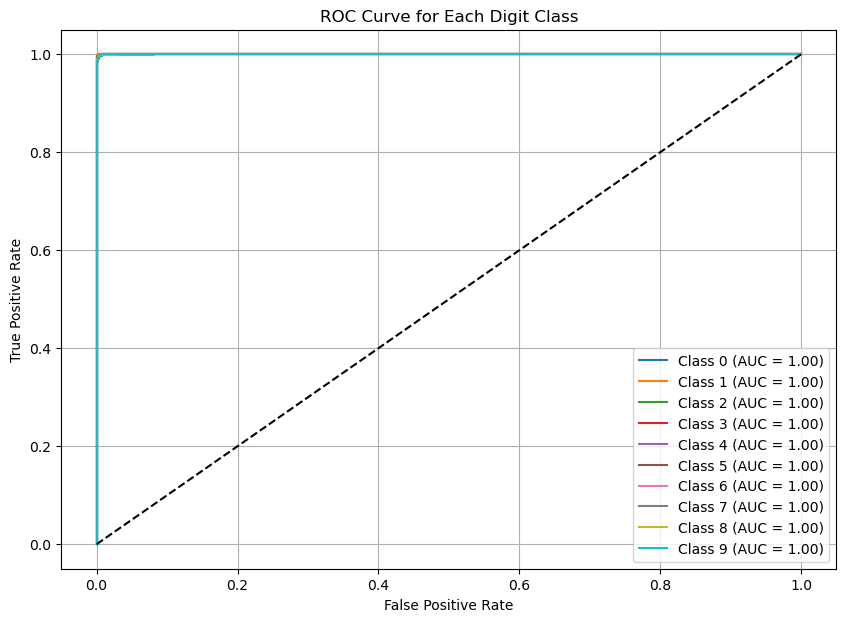

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split train set further into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', TopKCategoricalAccuracy(k=3)])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate Model
test_loss, test_acc, test_top3_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Top-3 Accuracy: {test_top3_acc:.4f}")

# Plot Training & Validation Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss Curves')
plt.grid()
plt.show()

# ROC Curve & AUC Calculation
y_pred_probs = model.predict(X_test)  # Probabilities for each class
y_test_binary = label_binarize(np.argmax(y_test, axis=1), classes=np.arange(10))  # Convert labels for ROC

plt.figure(figsize=(10, 7))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Digit Class')
plt.legend()
plt.grid()
plt.show()



Training on Bias Level 1.5...


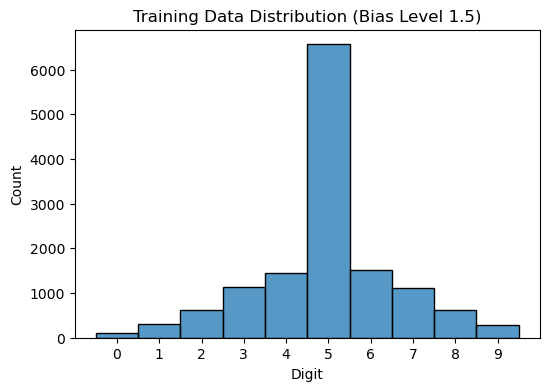

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7462 - loss: 0.8122 - val_accuracy: 0.9671 - val_loss: 0.1021
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9592 - loss: 0.1368 - val_accuracy: 0.9700 - val_loss: 0.0844
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9711 - loss: 0.0930 - val_accuracy: 0.9767 - val_loss: 0.0731
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9767 - loss: 0.0764 - val_accuracy: 0.9793 - val_loss: 0.0688
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9805 - loss: 0.0637 - val_accuracy: 0.9857 - val_loss: 0.0547
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9851 - loss: 0.0466 - val_accuracy: 0.9872 - val_loss: 0.0454
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9878 - loss: 0.0374 - val_accuracy: 0.9892 - val_loss: 0.0436
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9879 - loss: 0.0364 - val_accuracy: 0.

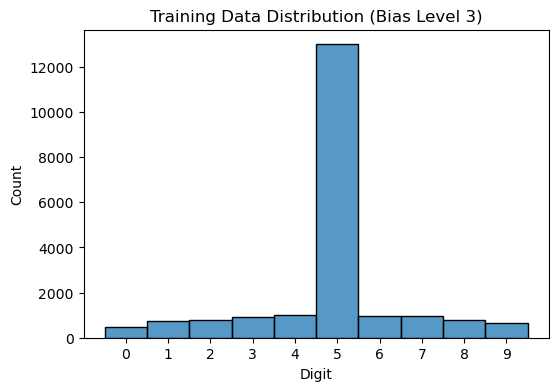

Epoch 1/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8273 - loss: 0.5941 - val_accuracy: 0.9749 - val_loss: 0.0886
Epoch 2/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9662 - loss: 0.1142 - val_accuracy: 0.9815 - val_loss: 0.0602
Epoch 3/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9756 - loss: 0.0752 - val_accuracy: 0.9844 - val_loss: 0.0556
Epoch 4/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9850 - loss: 0.0503 - val_accuracy: 0.9874 - val_loss: 0.0477
Epoch 5/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9890 - val_loss: 0.0438
Epoch 6/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 7/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9897 - val_loss: 0.0424
Epoch 8/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9946 - loss: 0.0188 - val_accuracy: 0.

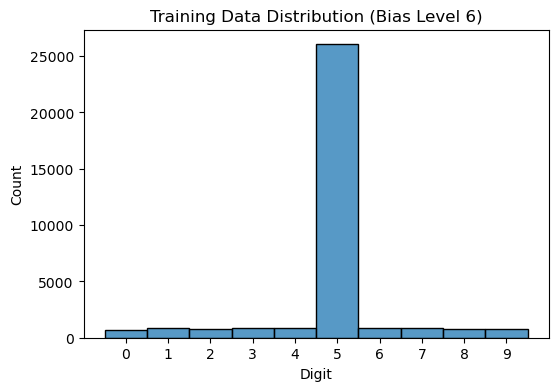

Epoch 1/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8939 - loss: 0.3976 - val_accuracy: 0.9874 - val_loss: 0.0441
Epoch 2/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9927 - val_loss: 0.0288
Epoch 3/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9885 - loss: 0.0387 - val_accuracy: 0.9934 - val_loss: 0.0243
Epoch 4/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9948 - val_loss: 0.0197
Epoch 5/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9956 - val_loss: 0.0202
Epoch 6/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.9950 - val_loss: 0.0184
Epoch 7/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9948 - val_loss: 0.0234
Epoch 8/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9953 - loss: 0.0150 - 

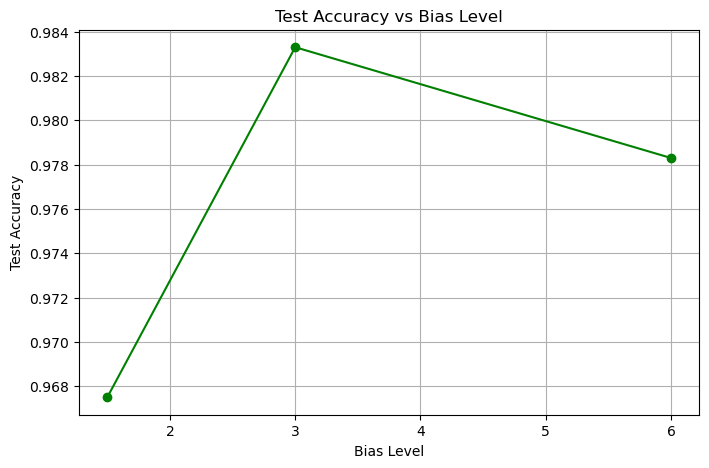

In [65]:
#14
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from collections import Counter

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_test_categorical = to_categorical(y_test, num_classes=10)

# Function to create biased training datasets
def create_biased_dataset(X, y, bias_level):
    """
    Creates a biased dataset where digit '5' is dominant and other digits
    follow a Gaussian distribution centered around '5'.

    bias_level: Defines the dominance of '5' (higher values = more dominant).
    """
    np.random.seed(42)
    
    # Extract all '5' digits
    indices_5 = np.where(y == 5)[0]
    num_fives = int(len(indices_5) * bias_level)  # Ensure num_fives is an integer
    chosen_fives = np.random.choice(indices_5, num_fives, replace=True)

    # Create Gaussian distribution centered around 5
    other_digits = [0, 1, 2, 3, 4, 6, 7, 8, 9]
    distribution_weights = np.exp(-0.5 * (np.array(other_digits) - 5)**2 / (2 * (bias_level) ** 2))
    distribution_weights /= distribution_weights.sum()  # Normalize

    # Sample other digits according to the distribution
    chosen_other_indices = []
    for digit, weight in zip(other_digits, distribution_weights):
        digit_indices = np.where(y == digit)[0]
        num_samples = int(len(digit_indices) * weight * 1.5)  # Ensure num_samples is an integer
        num_samples = max(1, num_samples)  # Ensure we get at least one sample
        chosen_other_indices.extend(np.random.choice(digit_indices, num_samples, replace=False))

    # Combine and shuffle
    final_indices = np.concatenate([chosen_fives, chosen_other_indices])
    np.random.shuffle(final_indices)

    return X[final_indices], y[final_indices]

# Train and test the model on 3 different levels of bias
bias_levels = [1.5, 3, 6]  # Increasing bias towards digit 5
results = {}

for i, bias in enumerate(bias_levels):
    print(f"\nTraining on Bias Level {bias}...")

    # Generate biased dataset
    X_train, y_train = create_biased_dataset(X_train_full, y_train_full, bias)

    # Split into training and validation sets (we don't need to split from the full dataset)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Convert labels to categorical
    y_train_categorical = to_categorical(y_train, num_classes=10)
    y_val_categorical = to_categorical(y_val, num_classes=10)

    # Display class distribution
    plt.figure(figsize=(6, 4))
    sns.histplot(y_train, bins=np.arange(11)-0.5, kde=False)
    plt.xticks(range(10))
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.title(f"Training Data Distribution (Bias Level {bias})")
    plt.show()

    # Build CNN Model
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train Model
    history = model.fit(X_train, y_train_categorical, 
                        validation_data=(X_val, y_val_categorical),
                        epochs=10, batch_size=32, verbose=1)

    # Evaluate Model
    test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
    results[bias] = test_acc
    print(f"Test Accuracy (Bias Level {bias}): {test_acc:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='g')
plt.xlabel('Bias Level')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Bias Level')
plt.grid()
plt.show()


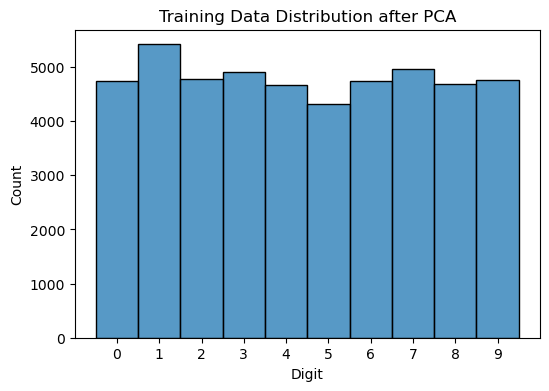

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2123 - loss: 2.1259 - val_accuracy: 0.3871 - val_loss: 1.6716
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3799 - loss: 1.6734 - val_accuracy: 0.4556 - val_loss: 1.5247
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4352 - loss: 1.5432 - val_accuracy: 0.5005 - val_loss: 1.4039
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4785 - loss: 1.4449 - val_accuracy: 0.5305 - val_loss: 1.3236
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5084 - loss: 1.3834 - val_accuracy: 0.5555 - val_loss: 1.2657
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5280 - loss: 1.3319 - val_accuracy: 0.5748 - val_loss: 1.2449
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5502 - loss: 1.2905 - val_accuracy: 0.5911 - val_loss: 1.1838
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5596 - loss: 1.2610 - 

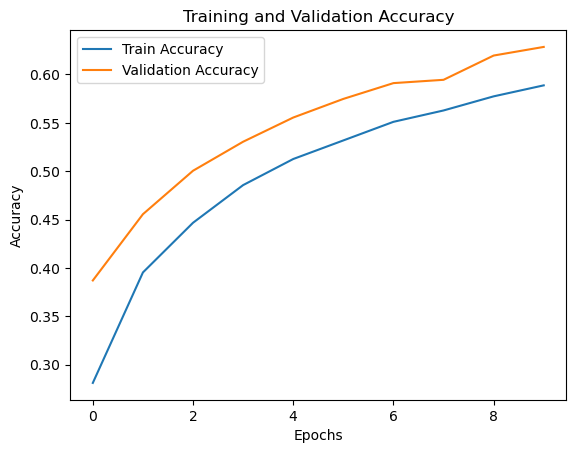

In [90]:
#15
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Flatten the images for PCA (flattening to 2D array: [samples, features])
X_train_flattened = X_train_full.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=128)  # Increase to 128 components
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

# Reshape the PCA output back into 2D (e.g., 16x8 "images")
X_train_pca = X_train_pca.reshape(-1, 16, 8, 1)  # Now we have 16x8 images
X_test_pca = X_test_pca.reshape(-1, 16, 8, 1)    # Now we have 16x8 images

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train_full, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=10)
y_val_categorical = to_categorical(y_val, num_classes=10)

# Display class distribution of training data
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=np.arange(11)-0.5, kde=False)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title(f"Training Data Distribution after PCA")
plt.show()

# Build CNN Model
# If you're still facing issues, switch to global pooling
model = Sequential([
    Input(shape=(8, 8, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Replace MaxPooling with GlobalAveragePooling
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train_categorical, 
                    validation_data=(X_val, y_val_categorical),
                    epochs=10, batch_size=32, verbose=1)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test_pca, y_test_categorical, verbose=0)
print(f"Test Accuracy after PCA (CNN): {test_acc:.4f}")

# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Explained variance ratio of PCA: 0.9502


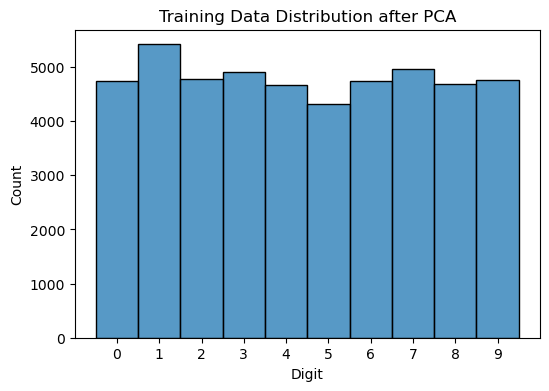

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5968 - loss: 1.2055 - val_accuracy: 0.9294 - val_loss: 0.2440
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.4186 - val_accuracy: 0.9435 - val_loss: 0.1907
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9014 - loss: 0.3345 - val_accuracy: 0.9527 - val_loss: 0.1604
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9164 - loss: 0.2852 - val_accuracy: 0.9574 - val_loss: 0.1400
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9245 - loss: 0.2621 - val_accuracy: 0.9619 - val_loss: 0.1281
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9322 - loss: 0.2350 - val_accuracy: 0.9646 - val_loss: 0.1152
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9335 - loss: 0.2295 - val_accuracy: 0.9657 - val_loss: 0.1109
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9411 - loss: 0.2121 - 

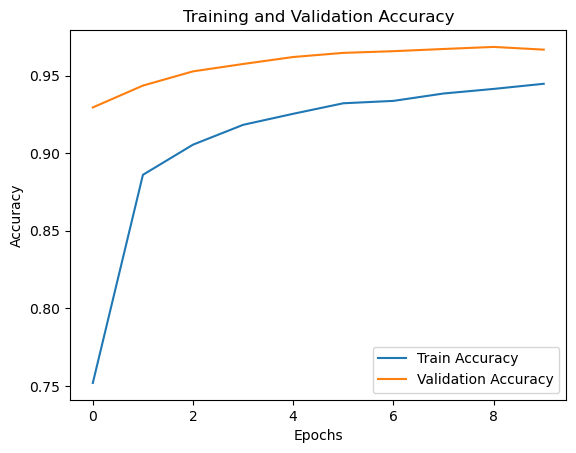

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Flatten the images for PCA (flattening to 2D array: [samples, features])
X_train_flattened = X_train_full.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

# Show the explained variance ratio to see how much information PCA retains
print(f"Explained variance ratio of PCA: {np.sum(pca.explained_variance_ratio_):.4f}")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train_full, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=10)
y_val_categorical = to_categorical(y_val, num_classes=10)

# Display class distribution of training data
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=np.arange(11)-0.5, kde=False)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title(f"Training Data Distribution after PCA")
plt.show()

# Build MLP Model (using Dense layers)
model = Sequential([
    Input(shape=(X_train_pca.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train_categorical, 
                    validation_data=(X_val, y_val_categorical),
                    epochs=10, batch_size=32, verbose=1)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test_pca, y_test_categorical, verbose=0)
print(f"Test Accuracy after PCA (MLP): {test_acc:.4f}")

# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
